In [1]:
import serial
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np
import datetime
import os

In [2]:
# Replace 'COM4' with the port your Arduino is connected to
# Raspi Port ttyACM0
arduino_port = 'COM4'
baud_rate = 9600
# Open the serial connection
ser = serial.Serial(arduino_port, baud_rate)

In [3]:
# Create a CSV file to store the data
# Get current date and time
now = datetime.datetime.now()
# Format the date-time string as 'MMDDYYYY-HHMM'
date_time_str = now.strftime("%d%m%Y-%H%M")
csv_file_path = f'{date_time_str}.csv'
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['sensor_value'])  # Header row
    
    start_time = time.time()
    while (time.time() - start_time) <= 30:  # Run for 60 seconds
        try:
            # Read a line from the serial port
            line = ser.readline().decode().strip()
            print(line)  # Print the received data
            
            # Write the received sensor value to the CSV file
            csv_writer.writerow([line])

        except KeyboardInterrupt:
            break

# Close the serial connection
ser.close()
print("Serial connection closed.")


0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.78
0.96
1.33
2.16
2.23
2.16
2.05
1.95
1.85
1.76
1.69
1.62
1.56
1.51
1.46
1.42
1.41
1.52
1.74
1.76
2.01
2.19
2.18
2.12
2.07
Serial connection closed.


In [4]:
# Read data from CSV file
data = []
with open(csv_file_path, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Skip header row
    for row in csv_reader:
        data.append(float(row[0]))

In [5]:
# Calculate vmin and vmax from the data
vmin = min(data)
vmax = 4

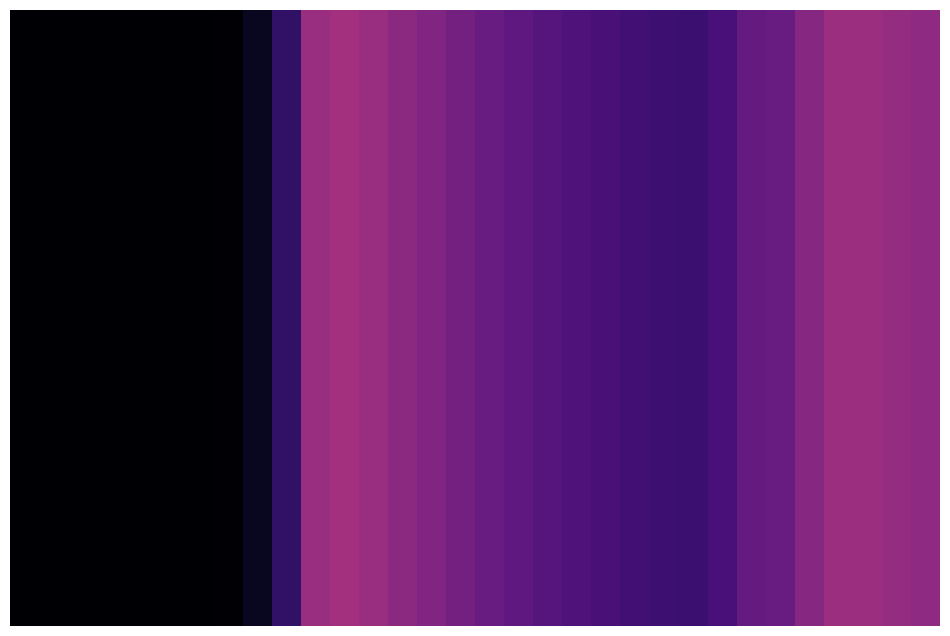

In [6]:
# Assuming 'heatmaps' folder exists, if not, create it
if not os.path.exists('heatmaps'):
    os.makedirs('heatmaps')
# Get the dynamic shape based on the size of the data
heatmap_shape = (1, len(data))
# Reshape data for heatmap
heatmap_data = np.array(data).reshape(*heatmap_shape)

# Create heatmap
plt.figure(figsize=(12, 8))
# heatmap themes = viridis, magma
sns.heatmap(heatmap_data, annot=False, fmt=".5f", cmap="magma", xticklabels=10, yticklabels=10, cbar=False,
             vmin=vmin, vmax=vmax
)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.axis('off')

# Save the heatmap in the 'heatmaps' folder
plt.savefig(f'heatmaps/{date_time_str}.png', bbox_inches='tight')

plt.show()